In [1]:
# for weather data info on how to call through json: https://openweathermap.org/current
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kapaa us
pacific grove us
ostrovnoy ru
butaritari ki
rikitea pf
kapaa us
jamestown sh
seymchan ru
busselton au
san quintin mx
hofn is
ulety ru
padang id
longyearbyen sj
mantua cu
punta arenas cl
taolanaro mg
maragheh ir
kapaa us
barrow us
butaritari ki
port alfred za
saint-francois gp
albany au
bredasdorp za
flinders au
punta arenas cl
ushuaia ar
toliary mg
palabuhanratu id
cape town za
saint george bm
saint-pierre re
vaini to
rikitea pf
beloha mg
vaini to
paamiut gl
hami cn
olafsvik is
ribeira grande pt
porto belo br
tasiilaq gl
busselton au
new norfolk au
whitehorse ca
rikitea pf
vaini to
pacific grove us
guararapes br
mar del plata ar
mys shmidta ru
saint george bm
rikitea pf
butaritari ki
sturgis us
luganville vu
saint-georges gf
atuona pf
new norfolk au
faanui pf
avarua ck
carnarvon au
necochea ar
oussouye sn
east london za
kapaa us
nanortalik gl
arlit ne
tasiilaq gl
norman wells ca
maningrida au
mukhen ru
labuhan id
upernavik gl
jamestown sh
butaritari ki
illoqqortoormiut gl
sain

punta arenas cl
mataura pf
carutapera br
itanhem br
butaritari ki
lata sb
ushuaia ar
kodiak us
attawapiskat ca
ribeira grande pt
new norfolk au
khatanga ru
castro cl
kieta pg
port augusta au
busselton au
qabaqcol az
saleaula ws
barrow us
kismayo so
belmonte br
sakakah sa
coahuayana mx
atuona pf
hermanus za
coolum beach au
hilo us
saldanha za
hamilton bm
punta arenas cl
arraial do cabo br
jalu ly
birnin kebbi ng
mataura pf
hermanus za
la ronge ca
macaboboni ph
vaini to
bredasdorp za
moerai pf
koslan ru
san carlos de bariloche ar
hermanus za
punta arenas cl
barrow us
rikitea pf
esso ru
hualmay pe
nikolskoye ru
husavik is
castro cl
puerto ayora ec
barrow us
ushuaia ar
hobart au
owen sound ca
natal br
victoria sc
naze jp
thompson ca
ancud cl
rognan no
rikitea pf
busselton au
souillac mu
san quintin mx
mongu zm
nikolskoye ru
khorixas na
qaanaaq gl
busselton au
aitape pg
rikitea pf
ushuaia ar
cape town za
puerto ayora ec
rikitea pf
vila velha br
rikitea pf
ushuaia ar
busselton au
ushuaia ar


mahebourg mu
dikson ru
jyvaskyla fi
ushuaia ar
ushuaia ar
hobart au
dharchula in
talnakh ru
mehamn no
airai pw
avarua ck
yei sd
upernavik gl
tuktoyaktuk ca
kushmurun kz
lahaina us
chicama pe
rikitea pf
abu samrah qa
tiksi ru
kapaa us
rawson ar
upernavik gl
kollumerland nl
machiques ve
skagastrond is
voh nc
amberley nz
hilo us
tasiilaq gl
touros br
port alfred za
namibe ao
udachnyy ru
albany au
husavik is
rikitea pf
deputatskiy ru
avarua ck
cape town za
taolanaro mg
busselton au
kapaa us
vila franca do campo pt
bambous virieux mu
punta arenas cl
harper lr
ixtapa mx
qaanaaq gl
villa guerrero mx
cambridge us
busselton au
norman wells ca
qaanaaq gl
codrington ag
batsfjord no
hobart au


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [9]:
# Import the requests and datetime library.
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a71648e8be4232311edeaed5cf7a03db


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a71648e8be4232311edeaed5cf7a03db&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [429]>

In [13]:
city_weather.status_code

429

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [429]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"cod":429, "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [19]:
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
boston_data['sys']['country']

KeyError: 'sys'

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37 75 90 8.05


In [22]:
city_data = []
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-02-03 18:42:14'

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [24]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | illoqqortoormiut
Processing Record 2 of Set 13 | qaanaaq
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | albany
Processing Record 5 of Set 13 | jaguey grande
Processing Record 6 of Set 13 | umm bab
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | kolobrzeg
Processing Record 9 of Set 13 | waconia
Processing Record 10 of Set 13 | adrar
Processing Record 11 of Set 13 | hadejia
Processing Record 12 of Set 13 | chokurdakh
Processing Record 13 of Set 13 | nemuro
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | mar del plata
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | olafsvik
Processing Record 18 of Set 13 | broken hill
Processing Record 19 of Set 13 | dong xoai
Processing Record 20 of Set 13 | tuktoyaktuk
Processing Record 21 of Set 13 | cape town
Processing Record 22 of Set 13 | hilo
Processing Record 23 of Set 13 | tasiilaq
Processing Record 24 of 

In [1]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_country = city_weather["sys"]["country"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

NameError: name 'cities' is not defined

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.

import pandas as pd

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-21.48,68,79,2.55,GL,2021-02-03 18:45:11
1,Rikitea,-23.1203,-134.9692,77.92,72,19,13.44,PF,2021-02-03 18:45:11
2,Albany,42.6001,-73.9662,33.01,68,100,8.99,US,2021-02-03 18:45:11
3,Jaguey Grande,22.5269,-81.1286,69.80,52,40,9.22,CU,2021-02-03 18:45:11
4,Umm Bab,25.2142,50.8072,64.99,63,1,6.91,QA,2021-02-03 18:45:11
5,Punta Arenas,-53.1500,-70.9167,60.80,59,75,13.80,CL,2021-02-03 18:41:10
6,Kolobrzeg,54.1757,15.5834,30.99,10,100,23.71,PL,2021-02-03 18:45:11
7,Waconia,44.8508,-93.7869,32.00,76,94,15.99,US,2021-02-03 18:45:12
8,Adrar,20.5022,-10.0711,70.43,22,0,3.20,MR,2021-02-03 18:45:12
9,Hadejia,12.4498,10.0444,76.12,17,0,10.27,NG,2021-02-03 18:40:20


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/03/21'

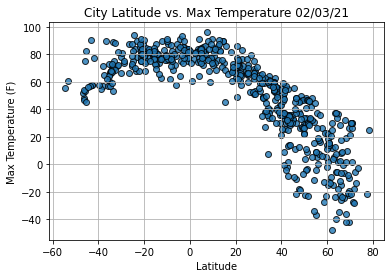

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

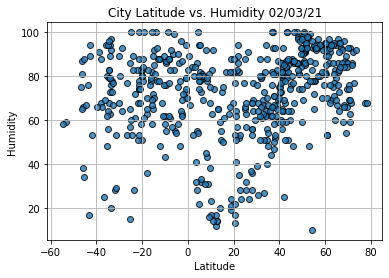

In [32]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

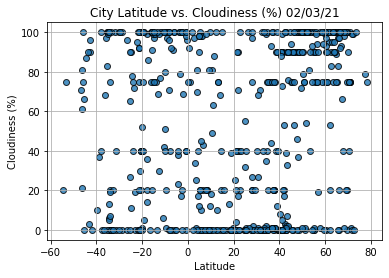

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


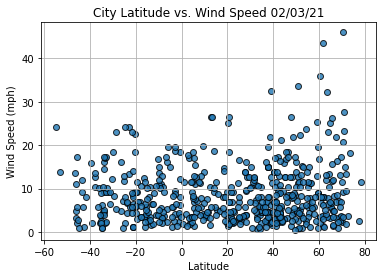

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

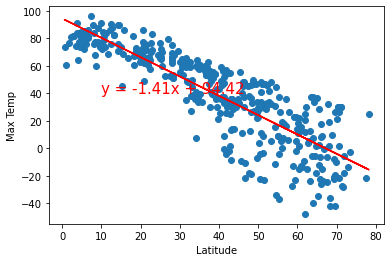

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

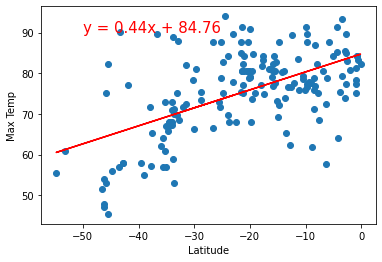

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

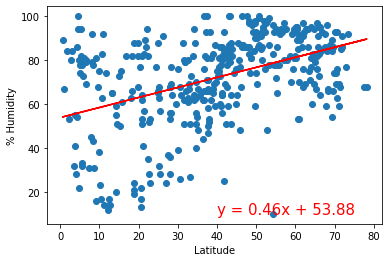

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

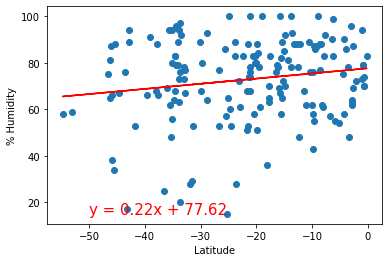

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

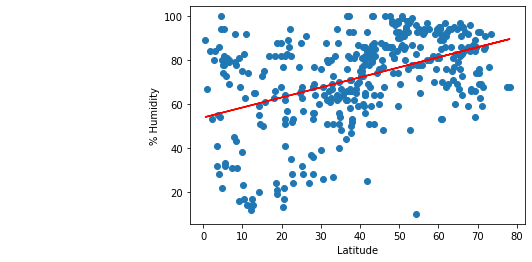

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

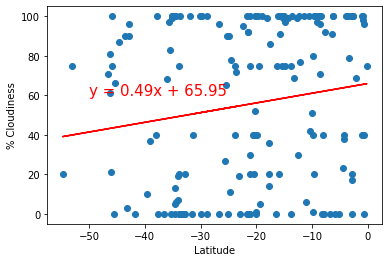

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

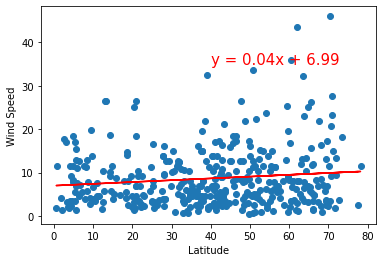

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

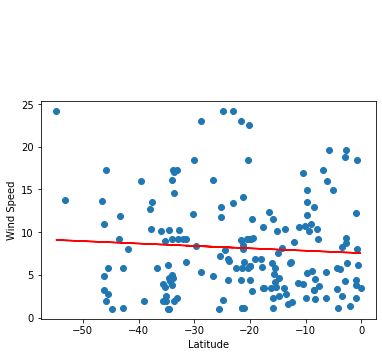

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [53]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (C:\Users\Anthony_Hendrickson\Desktop\BootCamp_Class_Folder\World_Weather_Analysis\config.py)